## Chebyshev's inequality program

In [25]:
# imports
import numpy as np
from scipy.stats import norm #normは正規分布
import matplotlib.pyplot as plt

## variables
# X scale
X = np.arange(0, 100, 0.1)

# Y scale
# pdfは, rvsが確率密度関数
# E[x]:50, V[x]:10^2
Ex = 50
Vx = 100
Y_pdf = norm.pdf(X, Ex, 10)
Y_rvs = norm.rvs(loc=Ex, scale=10, size=len(X))

# 非負の実数ε
epsilon = 20

# 一般化された際の範囲a, b
a = 0
b = 60

### Calc Chebyshev's inequality program

In [26]:
# チェビシェフの不等式(一般化なし)
def Chebyshev():
    # calc right-side
    chev = Vx/epsilon/epsilon

    # calc left-side
    flag = 0
    for loop in Y_rvs:
        if loop <= Ex-epsilon or Ex+epsilon <= loop:
            flag +=1

    # check
    print("Pr((x-Ex)^2) = "+str(flag/len(Y_rvs))+" <= "+str(chev)+" = V[x]/ε^2")
    
    # return right-side
    return chev

if "__main__" in __name__:
    print(Chebyshev())

Pr((x-Ex)^2) = 0.045 <= 0.25 = V[x]/ε^2
0.25


In [27]:
# チェビシェフの不等式(一般化あり)
def Chebyshev_uni():
    chev = (Vx + (Ex - (a+b)/2)**2) / ((b-a)/2)**2
    return chev

if "__main__" in __name__:
    print(Chebyshev_uni())
    

0.5555555555555556


### Calc half-Chebyshev's inequality program

In [35]:
# カンテリ、片側チェビシェフの不等式
def Chebyshev_half(eps):
    return (Vx/(Vx+(eps)**2))

if "__main__" in __name__:
    print(Chebyshev_half(10))

0.5


### plot graph

In [29]:
# ref : https://note.nkmk.me/python-for-usage/
# function return Chernoff's inqeuality upper bound
def Chernoff(t):
    # 期待値は総和で計算
    e_tx = 0
    for loop in Y_rvs:
        e_tx += np.exp(t*loop)
    
    return (e_tx / len(Y_rvs))/ np.exp(t*b)

# test
loop_list = np.arange(0.001, 2, 0.001)
min_apper_bound = [2147483647, -1]
for loop in loop_list:
    answer = Chernoff(loop)
    if answer < float(min_apper_bound[0]):
        min_apper_bound[0] = answer
        min_apper_bound[1] = loop
print("チェルノフの不等式の最小の値は、"+str(min_apper_bound[0])+" (t = '"+str(min_apper_bound[1])+"')")

チェルノフの不等式の最小の値は、0.5877152428062238 (t = '0.106')


In [30]:
# Y_rvs の 10刻みの棒グラフ用の変数
size = np.arange(0,10,1)
Pr10 = np.full(len(size), 0.)

for loop in size:
    for Pr in Y_rvs:
        if 10*loop <= Pr < 10*(loop+1):
            Pr10[loop] += 1/len(Y_rvs)
print("0     1     2     3     4     5     6     7     8     9     ")
print(Pr10)

0     1     2     3     4     5     6     7     8     9     
[0.    0.001 0.025 0.147 0.331 0.339 0.138 0.019 0.    0.   ]


Pr((x-Ex)^2) = 0.045 <= 0.25 = V[x]/ε^2


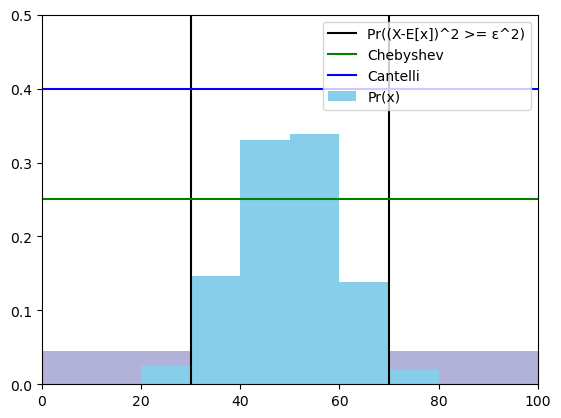

In [39]:
## #グラフの表示
# 基本の設定
plt.xlim(0,100)
plt.ylim(0,0.5)

# aの直線
plt.axvline(70, color='black', label="Pr((X-E[x])^2 >= ε^2)")
plt.axvline(30, color='black')

# 確率分布 (10刻み)
plt.bar(60+20, Pr10[0]+Pr10[1]+Pr10[2]+Pr10[7]+Pr10[8]+Pr10[9], 40, color='navy', alpha=0.3)
plt.bar(40-20, Pr10[0]+Pr10[1]+Pr10[2]+Pr10[7]+Pr10[8]+Pr10[9], 40, color='navy', alpha=0.3)
plt.bar(size*10+5, Pr10, 10, color='skyblue', label="Pr(x)")

# チェビシェフの不等式
plt.axhline(Chebyshev(), color='green', label="Chebyshev")
plt.axhline(Chebyshev_half(eps=20)*2, color='blue', label="Cantelli")

# 表示
plt.legend()
plt.show()

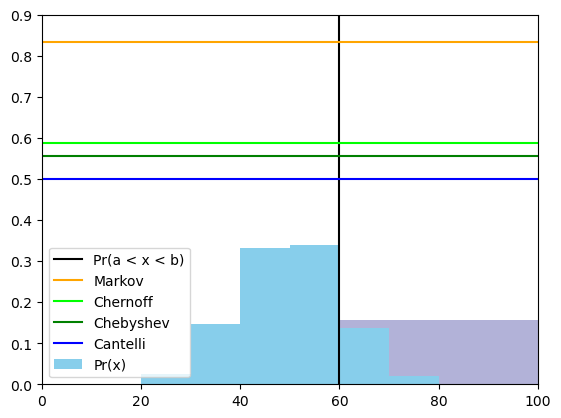

In [36]:
## #グラフの表示
# 基本の設定
plt.xlim(0,100)
plt.ylim(0,0.9)

# aの直線
plt.axvline(60, color='black', label="Pr(a < x < b)")

# 確率分布 (10刻み)
plt.bar(60+20, Pr10[6]+Pr10[7]+Pr10[8]+Pr10[9], 40, color='navy', alpha=0.3)
plt.bar(size*10+5, Pr10, 10, color='skyblue', label="Pr(x)")

# マルコフ、チェルノフ、チェビシェフの不等式
plt.axhline(Ex/b, color='orange', label="Markov")
plt.axhline(min_apper_bound[0], color='lime', label="Chernoff")
plt.axhline(Chebyshev_uni(), color='green', label="Chebyshev")
plt.axhline(Chebyshev_half(eps=10), color='blue', label="Cantelli")

# 表示
plt.legend()
plt.show()